# Praxisprojekt - Preprocessing und Visualisierung von Wetterdaten 
Wetterdaten vom 01.01.2015 - 21.12.2022 in Düsseldorf
Link: https://meteostat.net/de/place/de/dusseldorf?s=10400&t=2015-01-01/2022-12-31 - abgerufen 01.05.2023

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Daten einlesen und anzeigen

In [199]:
monatsnamen = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
df = pd.read_csv('wetterdaten2015-2022.csv')

In [200]:
df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2922 non-null   object 
 1   tavg    2922 non-null   float64
 2   tmin    2922 non-null   float64
 3   tmax    2922 non-null   float64
 4   prcp    2922 non-null   float64
 5   snow    2709 non-null   float64
 6   wdir    2914 non-null   float64
 7   wspd    2922 non-null   float64
 8   wpgt    2922 non-null   float64
 9   pres    2922 non-null   float64
 10  tsun    2922 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 251.2+ KB


## Datenaufbereitung
### Neue Spalten anlegen -> Jahr, Tag und Monat trennen

In [202]:
df['date'] = pd.to_datetime(df['date'])

In [203]:
df['Jahr'] = df['date'].dt.year
df['Monat'] = df['date'].dt.month
df['Tag'] = df['date'].dt.day


In [204]:
df.head(10)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Jahr,Monat,Tag
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318,2015,1,1
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132,2015,1,2
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0,2015,1,3
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378,2015,1,4
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228,2015,1,5
5,2015-01-06,2.7,0.3,5.0,1.6,0.0,166.0,14.8,32.8,1024.5,114,2015,1,6
6,2015-01-07,4.0,2.0,6.9,3.7,0.0,222.0,16.2,38.9,1028.1,348,2015,1,7
7,2015-01-08,5.7,2.6,9.1,20.9,0.0,193.0,22.0,48.6,1023.2,0,2015,1,8
8,2015-01-09,8.9,5.1,14.2,6.7,0.0,228.0,29.5,80.6,1019.7,0,2015,1,9
9,2015-01-10,10.9,3.7,14.4,3.1,0.0,254.0,34.2,79.2,1013.0,0,2015,1,10


### Wochenname & Monatsname hinzufügen

In [205]:
#df['Wochentag'] = df['date'].dt.day_name(locale='de_DE.UTF-8')
#df['Monatsname'] = df['date'].dt.month_name(locale='de_DE.UTF-8')

### Unnötige Spalten löschen

In [206]:
df.drop(['prcp'], axis=1, inplace=True)
df.drop(['snow'], axis=1, inplace=True)
df.drop(['wpgt'], axis=1, inplace=True)
df.drop(['pres'], axis=1, inplace=True)

In [207]:
df.head(10)

,date,tavg,tmin,tmax,wdir,wspd,tsun,Jahr,Monat,Tag
0,2015-01-01,1.7,-2.3,5.5,176.0,15.8,318,2015,1,1
1,2015-01-02,5.6,1.7,8.8,227.0,20.9,132,2015,1,2
2,2015-01-03,2.7,0.4,4.4,210.0,13.3,0,2015,1,3
3,2015-01-04,2.7,-1.5,6.4,266.0,11.5,378,2015,1,4
4,2015-01-05,2.7,-0.8,4.7,204.0,11.9,228,2015,1,5
5,2015-01-06,2.7,0.3,5.0,166.0,14.8,114,2015,1,6
6,2015-01-07,4.0,2.0,6.9,222.0,16.2,348,2015,1,7
7,2015-01-08,5.7,2.6,9.1,193.0,22.0,0,2015,1,8
8,2015-01-09,8.9,5.1,14.2,228.0,29.5,0,2015,1,9
9,2015-01-10,10.9,3.7,14.4,254.0,34.2,0,2015,1,10


### Spaltennamen umbenennen

'date': 'Datum','tavg': 'Durchschnittstemperatur', 'tmin': 'Min_Temperatur', 'tmax': 'Max_Temperatur', 'prcp': 'Gesamtniederschlag', 'snow': 'Schneehöhe', 'wdir': 'Windrichtung', 'wspd': 'Windgeschwindigkeit', 'wpgt': 'Spitzenhöhe', 'pres': 'Luftdruck', 'tsun': 'Sonnenscheindauer'

In [208]:
df.rename(columns={'date': 'Datum','tavg': 'Durchschnittstemperatur', 'tmin': 'Min_Temperatur', 'tmax': 'Max_Temperatur',  'wdir': 'Windrichtung', 'wspd': 'Windgeschwindigkeit', 'tsun': 'Sonnenscheindauer'}, inplace=True)

In [209]:
df.head(10)

,Datum,Durchschnittstemperatur,Min_Temperatur,Max_Temperatur,Windrichtung,Windgeschwindigkeit,Sonnenscheindauer,Jahr,Monat,Tag
0,2015-01-01,1.7,-2.3,5.5,176.0,15.8,318,2015,1,1
1,2015-01-02,5.6,1.7,8.8,227.0,20.9,132,2015,1,2
2,2015-01-03,2.7,0.4,4.4,210.0,13.3,0,2015,1,3
3,2015-01-04,2.7,-1.5,6.4,266.0,11.5,378,2015,1,4
4,2015-01-05,2.7,-0.8,4.7,204.0,11.9,228,2015,1,5
5,2015-01-06,2.7,0.3,5.0,166.0,14.8,114,2015,1,6
6,2015-01-07,4.0,2.0,6.9,222.0,16.2,348,2015,1,7
7,2015-01-08,5.7,2.6,9.1,193.0,22.0,0,2015,1,8
8,2015-01-09,8.9,5.1,14.2,228.0,29.5,0,2015,1,9
9,2015-01-10,10.9,3.7,14.4,254.0,34.2,0,2015,1,10


## Datenanalyse

Folgende Fragen sollen beantwortet werden:
- Wie ist die Durchschnittstemperatur pro Monat?
- In welchen Monaten ist die Temperatur am höchsten/niedrigsten?
- Wie ist die Veränderung der Temperatur pro Monat über die Jahre?
- Aus welchen Himmelsrichtung kommt der Wind am häufigsten?
- Wie ist die durchschnittliche Sonnenscheindauer ?


### 1) Durchschnittstemperatur nach Jahr und Monat

In [210]:
df_pivotAvgTemp = df.pivot_table(values='Durchschnittstemperatur', index='Jahr', columns='Monat', aggfunc='mean')
df_pivotAvgTemp

Monat,1,2,3,4,5,6,7,8,9,10,11,12
Jahr,,,,,,,,,,,,
2015,3.680645,3.057143,6.406452,9.703333,13.341935,16.863333,19.816129,19.916129,13.830000,10.003226,9.910000,9.493548
2016,4.741935,4.589655,5.280645,9.340000,15.119355,17.506667,19.509677,18.861290,18.380000,10.032258,6.086667,4.493548
2017,0.712903,5.825000,9.512903,8.490000,16.019355,19.540000,19.432258,18.441935,14.406667,13.232258,6.900000,4.645161
2018,5.883871,0.214286,5.235484,13.666667,17.187097,18.486667,22.496774,20.548387,15.776667,12.729032,7.250000,6.012903
2019,2.748387,6.817857,8.296774,11.380000,11.912903,20.456667,20.203226,20.109677,15.503333,12.400000,6.373333,5.909677
2020,5.670968,7.048276,7.409677,12.180000,13.677419,18.610000,18.322581,21.822581,15.973333,11.900000,8.726667,5.638710
2021,3.012903,4.707143,6.870968,7.060000,11.909677,19.893333,18.835484,17.351613,16.396667,11.535484,6.340000,5.445161
2022,4.616129,6.557143,7.945161,9.866667,15.522581,18.560000,20.061290,21.912903,15.466667,14.112903,9.206667,4.029032


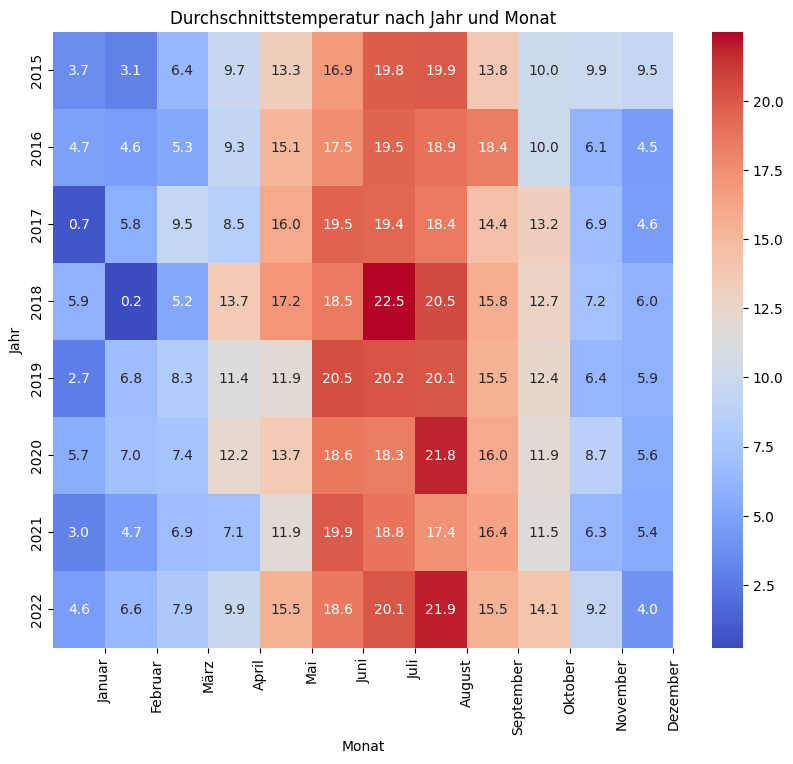

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_pivotAvgTemp, annot=True, cmap='coolwarm', fmt='.1f')
plt.xlabel('Monat')
plt.ylabel('Jahr')
plt.title('Durchschnittstemperatur nach Jahr und Monat')
plt.xticks(ticks=range(1, 13), labels=monatsnamen, rotation=90)

plt.show()

### 2) Änderung der Durchschnittstemperatur pro Jahr

In [212]:
temp_regYear = df.groupby([df['Jahr']])['Durchschnittstemperatur'].mean().reset_index()
temp_regYear

,Jahr,Durchschnittstemperatur
0,2015,11.389589
1,2016,11.179508
2,2017,11.466027
3,2018,12.203562
4,2019,11.866575
5,2020,12.259016
6,2021,10.811781
7,2022,12.358356


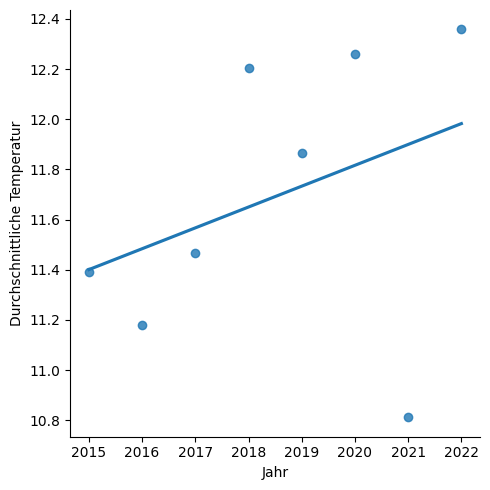

In [213]:
graph = sns.lmplot(data=temp_regYear, x='Jahr', y='Durchschnittstemperatur', ci=None)
graph.set_axis_labels("Jahr", "Durchschnittliche Temperatur")
plt.show()

### 3) Änderung der Durchschnittstemperatur pro Monat über die Jahre

In [214]:
temp_regMonth = df.groupby([df['Jahr'], df['Monat']])['Durchschnittstemperatur'].mean().reset_index()
temp_regMonth

,Jahr,Monat,Durchschnittstemperatur
0,2015,1,3.680645
1,2015,2,3.057143
2,2015,3,6.406452
3,2015,4,9.703333
4,2015,5,13.341935
...,...,...,...
91,2022,8,21.912903
92,2022,9,15.466667
93,2022,10,14.112903
94,2022,11,9.206667


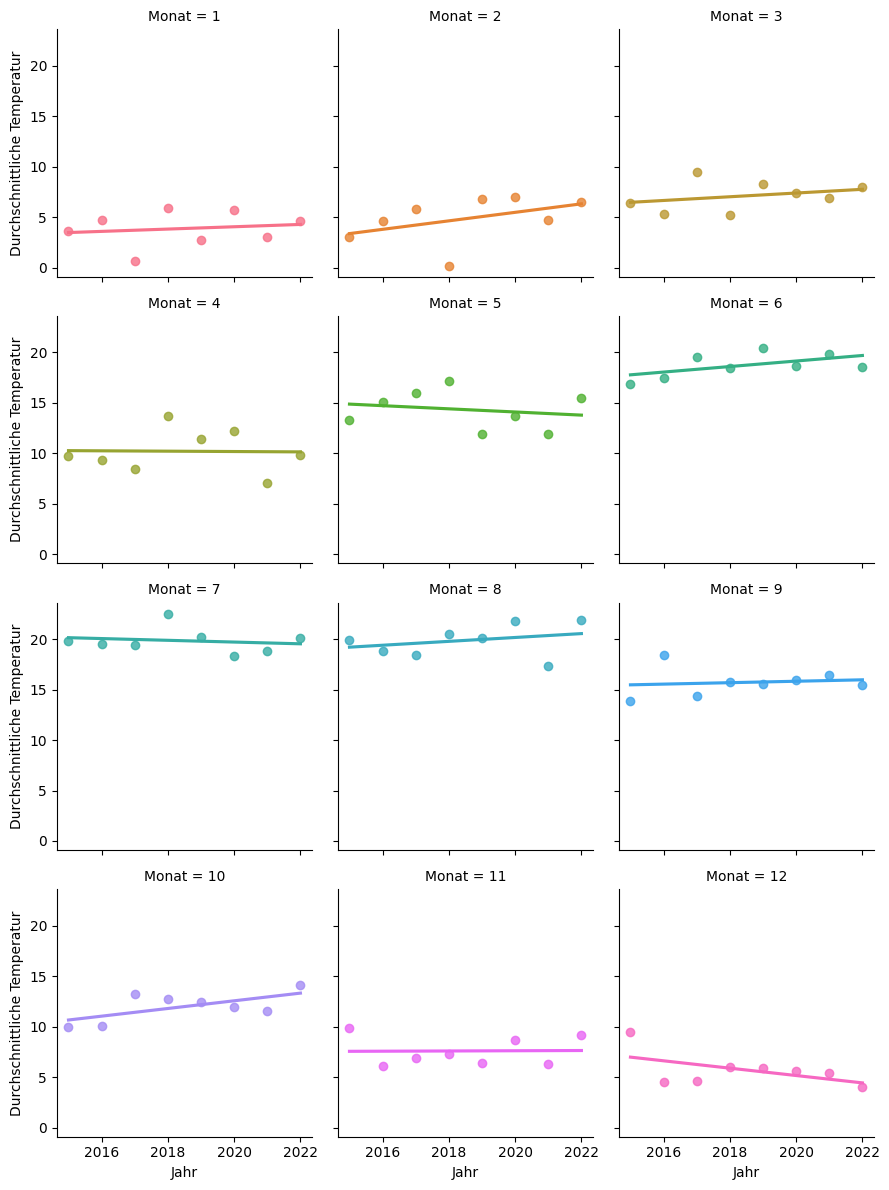

In [215]:
graph = sns.lmplot(data=temp_regMonth, x='Jahr', y='Durchschnittstemperatur', hue='Monat', col='Monat', col_wrap=3, height=3, aspect=1, ci=None)
graph.set_axis_labels("Jahr", "Durchschnittliche Temperatur")
plt.show()

### 4) Maximale Temperatur nach Jahr und Monat

In [216]:
df_groupedMax = df.groupby(['Jahr', 'Monat'])['Max_Temperatur'].max().reset_index()
df_groupedMax

,Jahr,Monat,Max_Temperatur
0,2015,1,14.4
1,2015,2,12.1
2,2015,3,18.4
3,2015,4,24.1
4,2015,5,26.2
...,...,...,...
91,2022,8,33.7
92,2022,9,30.8
93,2022,10,23.9
94,2022,11,17.4


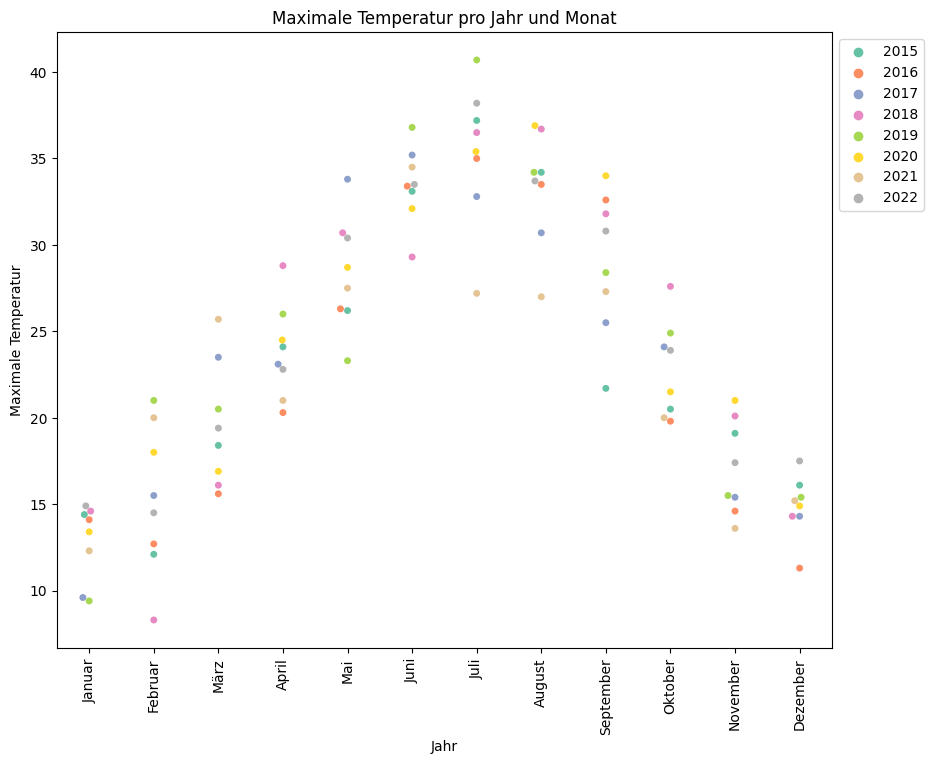

In [217]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df_groupedMax,x='Monat', y='Max_Temperatur', palette='Set2', hue="Jahr")
plt.title('Maximale Temperatur pro Jahr und Monat')
plt.xlabel('Monat')
plt.ylabel('Maximale Temperatur')
plt.xticks(ticks=range(0, 12), labels=monatsnamen, rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


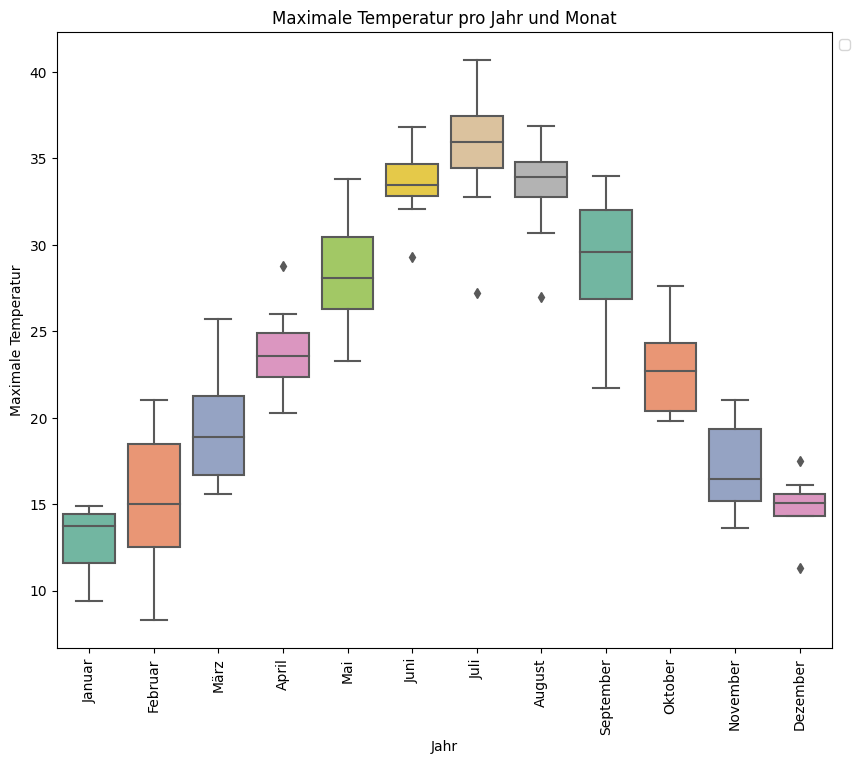

In [234]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_groupedMax,x='Monat', y='Max_Temperatur', palette='Set2')
plt.title('Maximale Temperatur pro Monat')
plt.xlabel('Monat')
plt.ylabel('Maximale Temperatur')
plt.xticks(ticks=range(0, 12), labels=monatsnamen, rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### 5) Minimale Temperatur nach Jahr und Monat

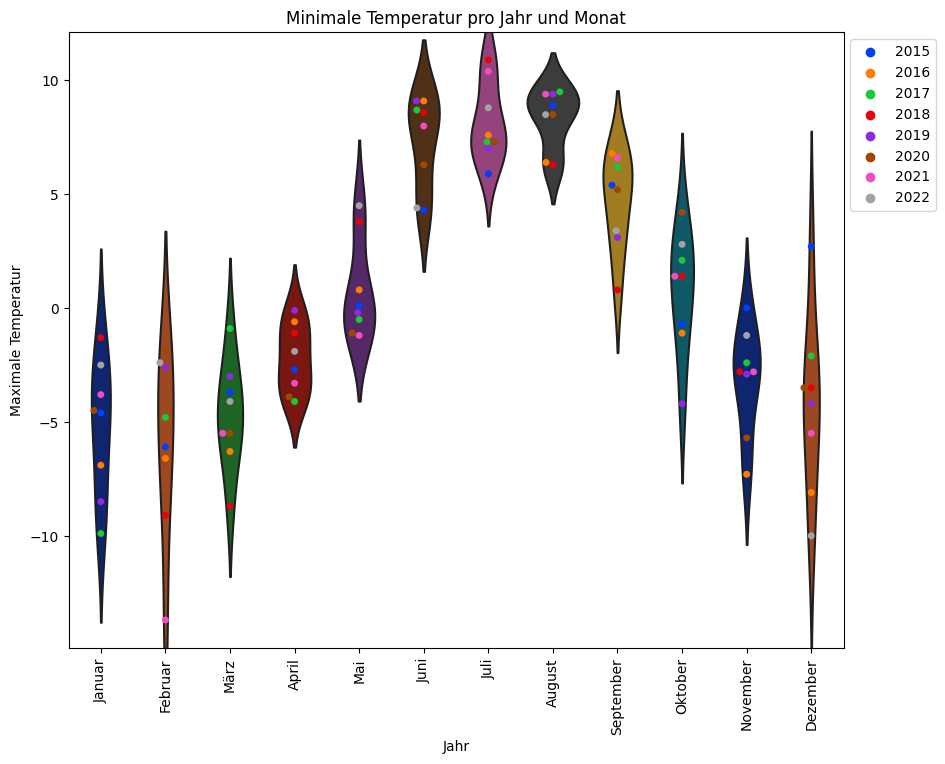

In [232]:
df_groupedMin = df.groupby(['Jahr', 'Monat'])['Min_Temperatur'].min().reset_index()
plt.figure(figsize=(10, 8))
sns.violinplot(data=df_groupedMin,x='Monat', y='Min_Temperatur', palette='dark', inner=None)
sns.swarmplot(data=df_groupedMin,x='Monat', y='Min_Temperatur', palette='bright', hue="Jahr")
plt.title('Minimale Temperatur pro Jahr und Monat')
plt.xlabel('Jahr')
plt.ylabel('Maximale Temperatur')
plt.xticks(ticks=range(0, 12), labels=monatsnamen, rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### 6) Häufigkeitsverteilung -> Windrichtung

In [219]:
def grad_zu_himmelsrichtung(grad):
    if grad >= 337.5 or grad < 22.5:
        return 'Nord'
    elif grad >= 22.5 and grad < 67.5:
        return 'Nordost'
    elif grad >= 67.5 and grad < 112.5:
        return 'Ost'
    elif grad >= 112.5 and grad < 157.5:
        return 'Südost'
    elif grad >= 157.5 and grad < 202.5:
        return 'Süd'
    elif grad >= 202.5 and grad < 247.5:
        return 'Südwest'
    elif grad >= 247.5 and grad < 292.5:
        return 'West'
    else:
        return 'Nordwest'

In [220]:
df['Himmelsrichtung'] = df['Windrichtung'].apply(grad_zu_himmelsrichtung)
himmelsrichtung = df['Himmelsrichtung'].value_counts() 
himmelsrichtung

Himmelsrichtung
Südwest     699
Süd         590
West        348
Südost      348
Nordost     331
Nord        277
Nordwest    197
Ost         132
Name: count, dtype: int64

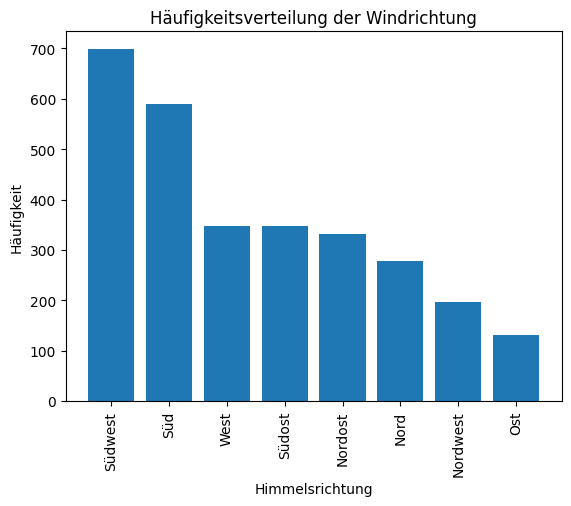

In [221]:
plt.bar(himmelsrichtung.index, himmelsrichtung.values)
plt.xlabel('Himmelsrichtung')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeitsverteilung der Windrichtung')
plt.xticks(rotation=90)
plt.show()

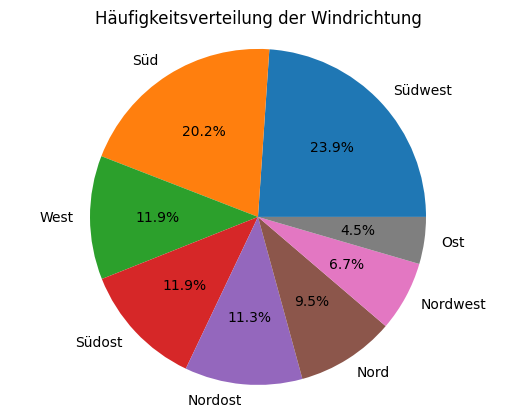

In [223]:
# Als Kreisdiagramm
plt.pie(himmelsrichtung.values, labels=himmelsrichtung.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Häufigkeitsverteilung der Windrichtung')

plt.show()

### 7) Durchschnittliche Sonnenscheindauer

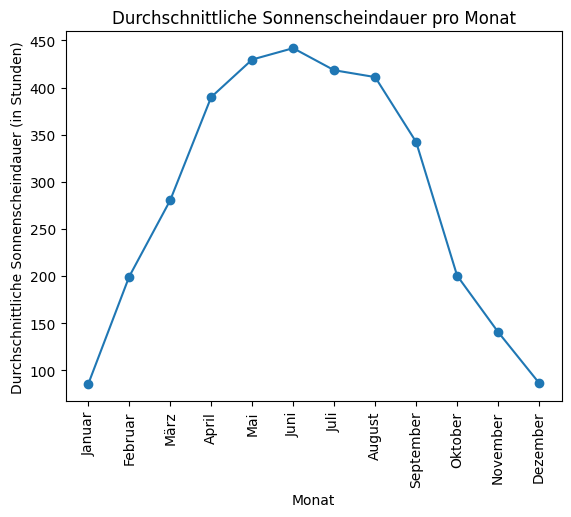

In [222]:
avg_sonnenscheindauer = df.groupby([df['Monat']])['Sonnenscheindauer'].mean()
plt.plot(avg_sonnenscheindauer.index, avg_sonnenscheindauer.values, marker='o')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Sonnenscheindauer (in Stunden)')
plt.title('Durchschnittliche Sonnenscheindauer pro Monat')
plt.xticks(ticks=range(1, 13), labels=monatsnamen, rotation=90)

# Zeige das Diagramm an
plt.show()

Anhand der Datenanalyse können folgende Schlüsse gezogen werden:
- Seit 2015 ist die durchschnittliche Temperatur im Januar um 0,5 Grad gestiegen